In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

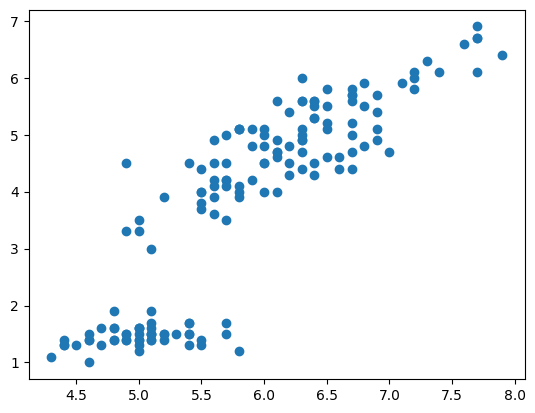

In [26]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
X = df[["sepal length (cm)"]] 
Y = df["petal length (cm)"]  

plt.scatter(X, Y)


In [27]:
def loss_function(m, b, X, Y):
    total_error = 0
    n = len(X)
    for i in range(n):
        x = X.iloc[i, 0]
        y = Y.iloc[i]
        total_error += (y - (m * x + b)) ** 2

    return total_error / n

def gradient_descent(m_now, b_now, X, Y, L):
    m_gradient = 0
    b_gradient = 0

    n = len(X)

    for i in range(n):
        x = X.iloc[i, 0]
        y = Y.iloc[i]

        m_gradient += x * (y - (m_now * x + b_now))
        b_gradient += y - (m_now * x + b_now)
        
    m_gradient *= -(2/n)
    b_gradient *= (-2/n)

    m = m_now - m_gradient * L
    b = b_now - b_gradient * L

    return m, b

1.8314938749760015 -6.9409767770288


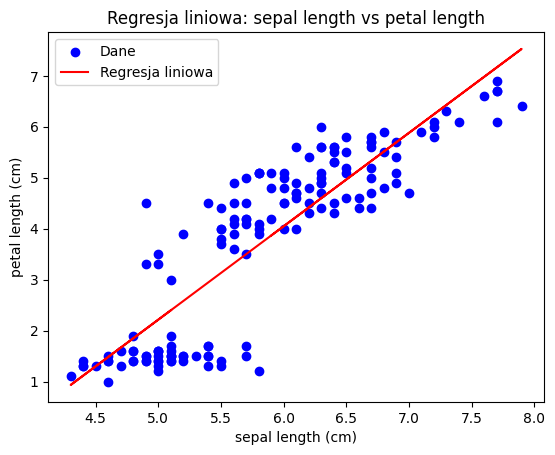

In [ ]:
m = 0
b = 0
L = 0.01
epochs = 10000

for i in range(epochs):
    m, b = gradient_descent(m, b, X, Y, L)

plt.scatter(X, Y, color="blue", label="Dane")
plt.plot(X, m * X + b, color="red", label="Regresja liniowa")  # y = mx + b
plt.xlabel("sepal length (cm)")
plt.ylabel("petal length (cm)")
plt.title("Regresja liniowa: sepal length vs petal length")
plt.legend()
plt.show()



own model: m = 1.8314938749760015, b = -6.9409767770288
sklearn: m = 1.8584329782548412, b = -7.101443369602455


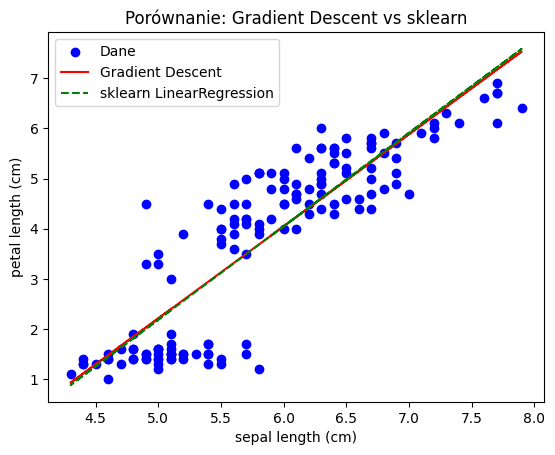

In [31]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
X_reshaped = X.values.reshape(-1, 1) 
model.fit(X_reshaped, Y)

print(f"own model: m = {m}, b = {b}")
print(f"sklearn: m = {model.coef_[0]}, b = {model.intercept_}")

plt.scatter(X, Y, color="blue", label="Dane")
plt.plot(X, m * X + b, color="red", label="Gradient Descent")
plt.plot(X, model.predict(X_reshaped), color="green", linestyle="--", label="sklearn LinearRegression")
plt.xlabel("sepal length (cm)")
plt.ylabel("petal length (cm)")
plt.title("Porównanie: Gradient Descent vs sklearn")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error


y_pred_custom = m * X.values + b
y_pred_sklearn = model.predict(X_reshaped)

mse_custom = mean_squared_error(Y, y_pred_custom)
mse_sklearn = mean_squared_error(Y, y_pred_sklearn)

print(f"Mean Squared Error (Gradient Descent): {mse_custom}")
print(f"Mean Squared Error (sklearn): {mse_sklearn}")


Mean Squared Error (Gradient Descent): 0.7435646522837065
Mean Squared Error (sklearn): 0.7430610341321241
